# Data Wrangling Template

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import tweepy
from tweepy.parsers import JSONParser
%matplotlib inline

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=JSONParser(), wait_on_rate_limit=True)


## Gather

In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
# Gather image predictions from Udacity's servers
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# check response code
response


<Response [200]>

In [5]:
# Save the provided image predictions
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
    

In [6]:
# Read the image predictions tsv file into a dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
teddy                         18
beagle                        18
Shetland_sheepdog             18
Maltese_dog                   18
Eskimo_dog                    18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [9]:
tweet = api.get_status(666020888022790149,tweet_mode='extended')

# Testing
print(tweet['id'])


666020888022790149


In [11]:
# Query the api and get erroneous tweets.
df_list = []
errors_list = []

tweets = twitter_archive['tweet_id']

for index, t in enumerate(tweets):

    try:
        tweet = api.get_status(t,tweet_mode='extended')

        print("Reading Tweet {}/{}. ({}%) complete.".format((index+1),len(tweets), round(((index+1)/len(tweets)) * 100,1)))
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_list.append({'tweet_id':int(t),
                        'retweet_count':int(retweet_count),
                        'favorite_count':int(favorite_count)
                       })

    
    
    except Exception as e:
        print(str(t) + str(e))
        errors_list.append(t)

print("Reading Process Completed.")

# save df of queried tweets to JSON and then convert to a dataframe
df_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_json.to_json('tweet_json.txt')

Reading Tweet 1/2356. (0.0%) complete.
Reading Tweet 2/2356. (0.1%) complete.
Reading Tweet 3/2356. (0.1%) complete.
Reading Tweet 4/2356. (0.2%) complete.
Reading Tweet 5/2356. (0.2%) complete.
Reading Tweet 6/2356. (0.3%) complete.
Reading Tweet 7/2356. (0.3%) complete.
Reading Tweet 8/2356. (0.3%) complete.
Reading Tweet 9/2356. (0.4%) complete.
Reading Tweet 10/2356. (0.4%) complete.
Reading Tweet 11/2356. (0.5%) complete.
Reading Tweet 12/2356. (0.5%) complete.
Reading Tweet 13/2356. (0.6%) complete.
Reading Tweet 14/2356. (0.6%) complete.


KeyboardInterrupt: 

**Note:*** The error you see above is caused by interrupting the cell. Running the cell takes about half an hour and is unnecessary, because i already did it before and saved the received data. Before submitting a project i clean all the code and output and rerun every cell to make sure everything works. But in this case i didn't want to download all the data again.

In [12]:
errors_list


[]

In [13]:
# read df of queried tweets
df_json = pd.read_json('tweet_json.txt')
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8165,37480
1,892177421306343426,6044,32218
10,890006608113172480,7052,29736
100,872486979161796608,8776,39657
1000,746818907684614144,1816,5480


## Assess

In [14]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
642,793210959003287553,NaN,NaN,2016-10-31 22:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maude. She's the h*ckin happiest wasp ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793210959...,10,10,Maude,None,None,None,None
770,776819012571455488,NaN,NaN,2016-09-16 16:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everybody look at this beautifu...,6.798284e+17,4.196984e+09,2015-12-24 00:58:27 +0000,https://twitter.com/dog_rates/status/679828447...,13,10,None,None,None,pupper,None
400,824775126675836928,NaN,NaN,2017-01-27 00:24:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scooter. His lack of opposable thumbs ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/824775126...,12,10,Scooter,None,None,None,None
533,807621403335917568,NaN,NaN,2016-12-10 16:22:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ollie Vue. He was a 3 legged pupper on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807621403...,14,10,Ollie,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
1466,694342028726001664,NaN,NaN,2016-02-02 02:10:14 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",It's okay pup. This happens every time I liste...,NaN,NaN,NaN,https://vine.co/v/iJWKejYdLlh,11,10,None,None,None,None,None
86,875747767867523072,NaN,NaN,2017-06-16 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Goose. He's a womanizer. Cheeky as h*c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875747767...,13,10,Goose,None,None,None,None
1379,701545186879471618,NaN,NaN,2016-02-21 23:13:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Millie. She's practicing her dive form fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701545186...,10,10,Millie,None,None,pupper,None
557,803380650405482500,NaN,NaN,2016-11-28 23:30:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sonny. He's an in-home movie critic. That...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803380650...,12,10,Sonny,None,None,None,None
1597,686050296934563840,NaN,NaN,2016-01-10 05:01:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flávio. He's a Macedonian Poppycock. 9...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686050296...,11,10,Flávio,None,None,None,None


In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
twitter_archive.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Lola               10
Penny              10
Tucker             10
Winston             9
Bo                  9
the                 8
Sadie               8
Toby                7
Daisy               7
an                  7
Buddy               7
Bailey              7
Scout               6
Milo                6
Dave                6
Rusty               6
Jax                 6
Stanley             6
Jack                6
Leo                 6
Koda                6
Oscar               6
Bella               6
Sunny               5
                 ... 
Newt                1
Meera               1
Rooney              1
Miley               1
Sparky              1
Eazy                1
Carper              1
Filup               1
Mojo                1
Tessa               1
Akumi               1
Peanut              1
Kara                1
Mutt                1
Georgie   

In [21]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2337 entries, 0 to 999
Data columns (total 3 columns):
tweet_id          2337 non-null int64
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
dtypes: int64(3)
memory usage: 73.0 KB


In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_predictions.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

### Observations
#### Quality Issues:
- Name column has not real names like "a" or "the"
- timestamp column has wrong datatype.
- expanded_urls column has missing values.
- rating_denominator should have only one denominator value.
- Different number of rows in each dataframe
- The dataset contains retweets.
- To be consistent all predictions should be either lowercase or uppercase
- image_predictions contans duplicated values.

#### Tidiness Issues:
- dog stage should be one variable.
- The datasets can be merged togehter.

## Clean
 

In [24]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
df_json_clean = df_json.copy()

#### Quality Issues:

1. Remove retweets from twitter_archive. Remove all 181 rows that contain a retweeted_status_id.

#### Define: ####
Grab all rows with a non null value for "retweeted_status_id" and assign it back to our dataframe.

#### Code:####

In [25]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].notnull() == False]

**Test:** After removing twitter_archive_clean should contain 181 entries less than twitter_archive

In [26]:
deleted_rows_count = len(twitter_archive) - len(twitter_archive_clean)
deleted_rows_count

181

2. Replace wrong dog names with None. All dog names start with a capital letter, so grabbing all values that start with a lowercase letter should work.

#### Define: ####

- Dog names are upperasce so first take all lowercase names from the name column.
- Then replace all occurences of the lowercase names with "None".

#### Code: ####

In [27]:
values = twitter_archive_clean[twitter_archive_clean.name.str[0].str.islower()]['name'].value_counts()
values.keys()

Index(['a', 'the', 'an', 'very', 'one', 'just', 'quite', 'actually', 'not',
       'getting', 'infuriating', 'such', 'life', 'space', 'unacceptable', 'my',
       'old', 'incredibly', 'all', 'mad', 'officially', 'by', 'his', 'this',
       'light'],
      dtype='object')

In [28]:
twitter_archive_clean.name.replace(values.keys(), 'None', inplace=True)

**Test:** We just have a look at the value count and can see that the count for "None" increased and values like "a" and "the" disappeared.

In [29]:
twitter_archive_clean.name.value_counts()

None        784
Charlie      11
Lucy         11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Sadie         8
Winston       8
Lola          8
Daisy         7
Toby          7
Oscar         6
Bella         6
Koda          6
Jax           6
Stanley       6
Bo            6
Bailey        6
Milo          5
Buddy         5
Dave          5
Bentley       5
Chester       5
Scout         5
Leo           5
Rusty         5
Louis         5
Clark         4
Duke          4
           ... 
Bobby         1
Willow        1
Kayla         1
Lili          1
Brady         1
Torque        1
Fido          1
Jaycob        1
Wafer         1
Terrance      1
Tobi          1
Darrel        1
Kyro          1
Oreo          1
Karl          1
Josep         1
Divine        1
Jeffrie       1
Chase         1
Colin         1
Shooter       1
Link          1
Bruiser       1
Balto         1
Dug           1
Pubert        1
Margo         1
Pherb         1
Binky         1
Barclay       1
Name: name, Length: 931,

3. Drop rows where expanded_urls is null, because they don't have images.

#### Define: ####

Grab all rows with a non null value from the dataframe and assing the resulting dataframe back.

#### Code: ####

In [30]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.notnull()]

**Test:** expanded_urls has no missing entries.

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: float64(4), int64(3), object(1

4. Convert timestamp into datetime

#### Define: ####

Use the builtin to_datetime method to conert the value.

#### Code: ####

In [33]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])


#### Test: #####

The info method shows the correct type for timestamp.

In [34]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns, UTC]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: datetime64[ns, UT

5. rating_denominator should only have one value.

#### Define: ####

Just assign the value 10 to all rows, which is the usual value for the denominator.

#### Code: ####

In [35]:
twitter_archive_clean.rating_denominator = 10

#### Test: ####

Again the info method will help to see if everything worked.

In [37]:
twitter_archive_clean.rating_denominator.value_counts()

10    2117
Name: rating_denominator, dtype: int64

6. To be consistent all predictions should be either lowercase or uppercase. I'll convert them to lowercase.

#### Define: ####

The lower() method will do the job.
#### Code: ####

In [38]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.lower()
image_predictions_clean.p2 = image_predictions_clean.p2.str.lower()
image_predictions_clean.p3 = image_predictions_clean.p3.str.lower()


#### Test: ####
In this case i'll just take a sample and see if the values are lowercased.

In [39]:
image_predictions_clean.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
623,680583894916304897,https://pbs.twimg.com/media/CXHrcFYWcAEE5_L.jpg,1,tub,0.889801,False,bathtub,0.032351,False,hippopotamus,0.014177,False
1841,838083903487373313,https://pbs.twimg.com/media/C6F42cGUYAAIKsX.jpg,2,chow,0.800975,True,seat_belt,0.164133,False,pomeranian,0.017981,True
141,668567822092664832,https://pbs.twimg.com/media/CUc64knWoAkZt70.jpg,1,shih-tzu,0.985649,True,lhasa,0.007078,True,pekinese,0.003053,True
1910,853299958564483072,https://pbs.twimg.com/media/C9eHyF7XgAAOxPM.jpg,1,grille,0.652280,False,beach_wagon,0.112846,False,convertible,0.086252,False
1688,815390420867969024,https://pbs.twimg.com/media/C1DZQiTXgAUqgRI.jpg,1,restaurant,0.279846,False,toyshop,0.091429,False,paper_towel,0.046147,False
1618,802572683846291456,https://pbs.twimg.com/media/CyNPmJgXcAECPuB.jpg,1,golden_retriever,0.610171,True,labrador_retriever,0.173252,True,cocker_spaniel,0.163257,True
1568,794332329137291264,https://pbs.twimg.com/media/CwYJBiHXgAQlvrh.jpg,1,samoyed,0.988307,True,malamute,0.004906,True,great_pyrenees,0.002901,True
49,666835007768551424,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,1,airedale,0.448459,True,toy_poodle,0.124030,True,teddy,0.110183,False
183,669353438988365824,https://pbs.twimg.com/media/CUoFZTyW4AE70iD.jpg,1,teddy,0.379656,False,pembroke,0.212343,True,chow,0.096995,True
420,674042553264685056,https://pbs.twimg.com/media/CVquIDRW4AEJrPk.jpg,1,toy_poodle,0.927975,True,miniature_poodle,0.068946,True,standard_poodle,0.001316,True


7. Image predictions contains duplicated values. I'll drop them.

#### Define: ####

Use the builtin drop_duplicates method and keep the first duplicated row.

#### Code: ####

In [40]:
image_predictions_clean.jpg_url.drop_duplicates(keep='first', inplace=True)

#### Test: ####
Combining duplicated() and value_counts() will show if there are any duplicated rows left.

In [41]:
image_predictions_clean.jpg_url.duplicated().value_counts()

False    2009
Name: jpg_url, dtype: int64

8. Different number of rows in each Dataset. I will join them into one dataset. This will also solve tidiness issue 1.

#### Define: ####

Merge the dataframes on the "tweet_id" column.

#### Code: ####

In [42]:
print(twitter_archive_clean.shape[0])
print(image_predictions_clean.shape[0])
print(df_json_clean.shape[0])

2117
2075
2337


In [43]:
main_df = twitter_archive_clean.merge(df_json_clean, on='tweet_id', how='inner')
main_df = main_df.merge(image_predictions_clean, on='tweet_id', how='inner')

#### Test: ####
The info method shows that we now have a single dataframe and only a few rows have missing values. These rows will be dropped in a later step.

In [44]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1989
Data columns (total 30 columns):
tweet_id                      1990 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1990 non-null datetime64[ns, UTC]
source                        1990 non-null object
text                          1990 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1990 non-null object
rating_numerator              1990 non-null int64
rating_denominator            1990 non-null int64
name                          1990 non-null object
doggo                         1990 non-null object
floofer                       1990 non-null object
pupper                        1990 non-null object
puppo                         1990 non-null object
retweet_count            

#### Tidiness Issues:

Dog stage should be one variable.

#### Define: ####
Create a new column "dog_stage" the walk through the current stage columns and put the first none null value in the new column.

#### Code: ####

In [45]:
# 1. Add a new column for the dog stage
main_df['dog_stage'] = 'none'

# 2. Define a method to extract the dog stage. Some dogs have more than one stage, in this case i use the first stage
def extract_dog_stage(row):
    if row['doggo'] == 'doggo':
        row['dog_stage'] = 'doggo'
    elif row['floofer'] == 'floofer':
        row['dog_stage'] = 'floofer'
    elif row['pupper'] == 'pupper':
        row['dog_stage'] = 'pupper'
    elif row['puppo'] == 'puppo':
        row['dog_stage'] = 'puppo'
    
    return row

main_df = main_df.apply(extract_dog_stage, axis=1)

#### Test: ####
Check the value count for the new row. We should have 1990 entris in total and the values sum up to the expected value.

In [46]:
main_df.dog_stage.value_counts()

none       1684
pupper      203
doggo        74
puppo        22
floofer       7
Name: dog_stage, dtype: int64

#### Drop unneeded rows

- The singel rows for dog stage can be dropped and also the rows retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp. They contain no values.

#### Code: ####


In [47]:
main_df.drop(['doggo', 'floofer', 'puppo', 'pupper', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test: ####
Use the info method to see if the columns are gone.

In [48]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1989
Data columns (total 24 columns):
tweet_id                 1990 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1990 non-null datetime64[ns, UTC]
source                   1990 non-null object
text                     1990 non-null object
expanded_urls            1990 non-null object
rating_numerator         1990 non-null int64
rating_denominator       1990 non-null int64
name                     1990 non-null object
retweet_count            1990 non-null int64
favorite_count           1990 non-null int64
jpg_url                  1990 non-null object
img_num                  1990 non-null int64
p1                       1990 non-null object
p1_conf                  1990 non-null float64
p1_dog                   1990 non-null bool
p2                       1990 non-null object
p2_conf                  1990 non-null float64
p2_dog        

### Store cleaned data

In [49]:
main_df.to_csv('twitter_archive_master.csv', index=False)

In [50]:
main_df = pd.read_csv('twitter_archive_master.csv')

### Analyze data

#### What are the 10 most common dog types?

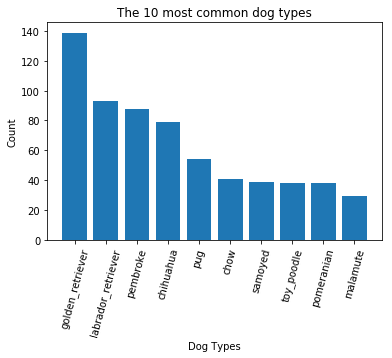

In [51]:
dog_types = main_df.p1.value_counts()

plt.bar(dog_types[:10].index, dog_types[:10])
plt.xticks(rotation=75)
plt.xlabel('Dog Types')
plt.ylabel('Count')
plt.title('The 10 most common dog types')
plt.show();

In [52]:
main_df.p1.value_counts()

golden_retriever             139
labrador_retriever            93
pembroke                      88
chihuahua                     79
pug                           54
chow                          41
samoyed                       39
toy_poodle                    38
pomeranian                    38
malamute                      29
cocker_spaniel                27
french_bulldog                25
chesapeake_bay_retriever      23
miniature_pinscher            22
seat_belt                     21
german_shepherd               20
siberian_husky                20
staffordshire_bullterrier     19
eskimo_dog                    18
maltese_dog                   18
shetland_sheepdog             18
teddy                         18
beagle                        17
cardigan                      17
rottweiler                    17
shih-tzu                      17
italian_greyhound             16
lakeland_terrier              16
kuvasz                        16
web_site                      15
          

#### What are the most common names?

In [53]:
main_df.name.value_counts().head(11)

None       644
Charlie     10
Cooper      10
Lucy        10
Oliver      10
Tucker       9
Penny        9
Winston      8
Sadie        8
Lola         7
Toby         7
Name: name, dtype: int64

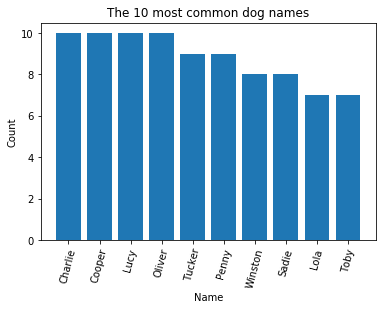

In [54]:
dog_names = main_df.name.value_counts()
# Earlier we replaced wrong names with 'None', which has now the most occurences. So we shift everything one step to the right.
plt.bar(dog_names[1:11].index, dog_names[1:11])
plt.xticks(rotation=75)
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('The 10 most common dog names')
plt.show();

#### Is there a correlation between retweet_count and _favorite_count?

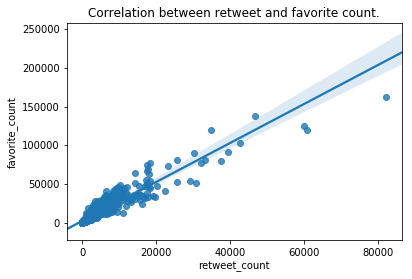

In [55]:
sns.regplot(main_df['retweet_count'], main_df['favorite_count']).set_title('Correlation between retweet and favorite count.');

#### Does the rating influence the retweet count?

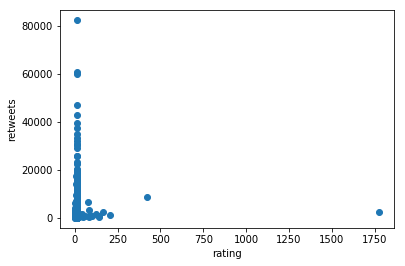

In [56]:
plt.scatter(main_df.rating_numerator, main_df.retweet_count);
plt.xlabel('rating')
plt.ylabel('retweets')

plt.show();

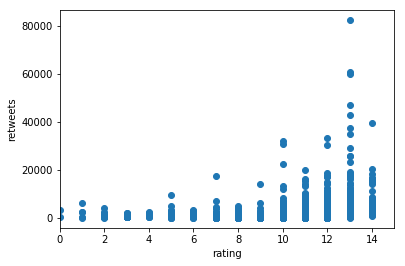

In [57]:
plt.scatter(main_df.rating_numerator, main_df.retweet_count);
plt.xlabel('rating')
plt.ylabel('retweets')
plt.xlim(0, 15)
plt.show();